<a href="https://colab.research.google.com/github/SLKS99/Understanding-the-Ligand-Assisted-Reprecipitation-of-CsPbBr3-Perovskite-Nanocrystals-via-High-Throug/blob/main/XRD_OAc_OLAm_CsPbBr3_Toluene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

January 5, 2023


Contributions:
- Data by Mahshid Ahmadi and Sheryl Sanchez, Jonghee Yang
- Analysis by Sheryl Sanchez and Jonghee Yang


In [1]:
#@title Import Modules 

import numpy as np
import pandas as pd


#Plotting Tools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from scipy import sparse
from scipy.sparse.linalg import spsolve


#gdown Installation
!pip install gdown==3.6.0



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#@title Data Information

#Name of files 
data_file_name = 'A1 XRD.csv' #@param {type:'string'}
composition_file_name = 'CsPbBr3 wells.csv' #@param {type:'string'}


A1= 'A1 again.csv'
A1_file= '1mw9qwvp-p6nQx36VBnfiFqwwJM-3WeuN'

A10_file = 'A10_PDS + PASS - 10-70 deg - 026 step - 90 sec - 12 minutes - no spin_1.csv'
A10_file_name= '1B6J_t-3LOTJJSY6-jrxe1YQeWnkvyU1f'

B5_file='B5-BG_PDS + PASS - 10-70 deg - 026 step - 150 sec - 20 minutes - no spin_1.csv'
B5_file_name= '1pZcx5K0OViqwKgqdVfzss6aMp94K7BZy'

B10_file='B10_PDS + PASS - 10-70 deg - 026 step - 150 sec - 20 minutes - no spin_1.csv'
B10_file_name='1qeILtTGPjS2z3rJqLoUQdnXaQWWJY8Ve'

In [3]:
#@title Download Files

!gdown https://drive.google.com/uc?id={A1_file}


!gdown https://drive.google.com/uc?id={A10_file_name}

!gdown https://drive.google.com/uc?id={B5_file_name}

!gdown https://drive.google.com/uc?id={B10_file_name}



Downloading...
From: https://drive.google.com/uc?id=1mw9qwvp-p6nQx36VBnfiFqwwJM-3WeuN
To: /content/A1 again.csv
100% 33.5k/33.5k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B6J_t-3LOTJJSY6-jrxe1YQeWnkvyU1f
To: /content/A10_PDS + PASS - 10-70 deg - 026 step - 90 sec - 12 minutes - no spin_1.csv
100% 34.1k/34.1k [00:00<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pZcx5K0OViqwKgqdVfzss6aMp94K7BZy
To: /content/B5-BG_PDS + PASS - 10-70 deg - 026 step - 150 sec - 20 minutes - no spin_1.csv
100% 22.4k/22.4k [00:00<00:00, 29.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qeILtTGPjS2z3rJqLoUQdnXaQWWJY8Ve
To: /content/B10_PDS + PASS - 10-70 deg - 026 step - 150 sec - 20 minutes - no spin_1.csv
100% 34.1k/34.1k [00:00<00:00, 40.0MB/s]


In [4]:


A1Data = pd.read_csv(A1,header=0)


A10Data = pd.read_csv(A10_file,header=0)

B5Data = pd.read_csv(B5_file,header=0)

B10Data = pd.read_csv(B10_file,header=0)

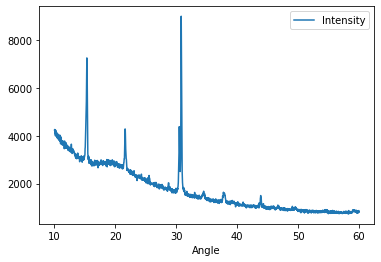

In [5]:
A1Data.plot(x='Angle')

Baseline correction is an algorithm found in a paper called "Asymmetric Least Squares Smoothin" by P.Eilers and H. Boelens in 2005

0.001< p< 0.1 for signal positive peaks asymmetry

10^2 <lambda < 10^9 for smoothing

In [6]:


def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [7]:
y= A1Data['Intensity']

In [8]:
A1= baseline_als(y, 1e5, 0.01, niter=10)

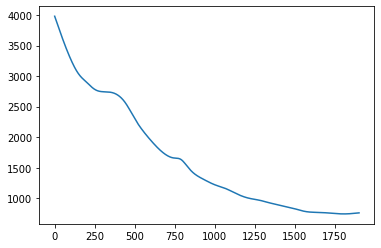

In [9]:
plt.plot(A1)

In [10]:
A1_final= y-A1

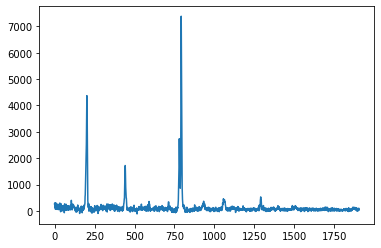

In [11]:
plt.plot(A1_final)

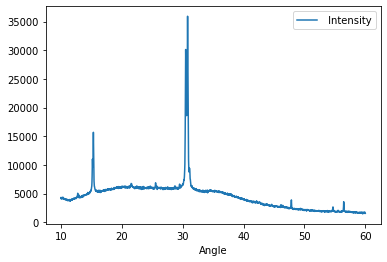

In [12]:
A10Data.plot(x='Angle')

In [13]:
A10Data.keys()

Index(['Angle', ' Intensity'], dtype='object')

In [14]:
y= A10Data[' Intensity']

In [15]:
A10= baseline_als(y, 1e6, 0.01, niter=10)

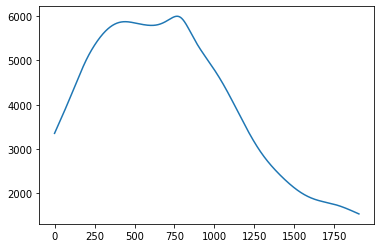

In [16]:
plt.plot(A10)

In [17]:
A10_final= y-A10

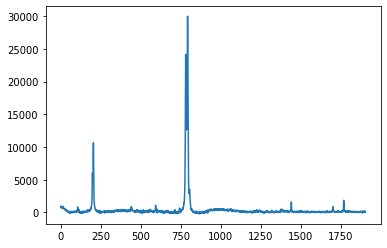

In [18]:
plt.plot(A10_final)

In [19]:
B5Data

,Angle,Intensity
0,10.013,0.0
1,10.039,-187.0
2,10.065,-186.0
3,10.091,-99.0
4,10.117,-49.0
...,...,...
1921,59.959,10.0
1922,59.985,-2.0
1923,[Non-ambient points],NaN
1924,Time,NaN


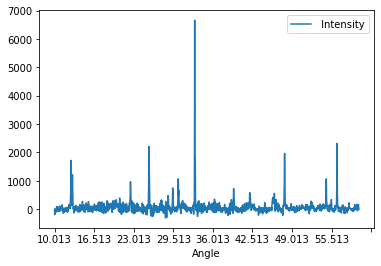

In [20]:
B5Data.plot(x='Angle')

y= B5Data[' Intensity']




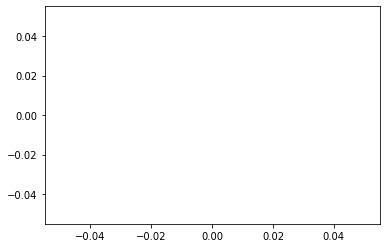

In [21]:
B5= baseline_als(y, 1e5, 0.01, niter=10)
plt.plot(B5)



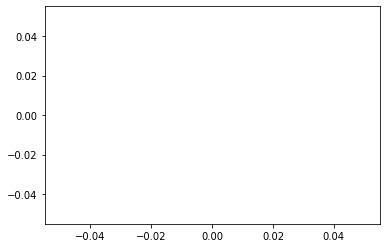

In [22]:
B5_final= y-B5

plt.plot(B5_final[:1905])

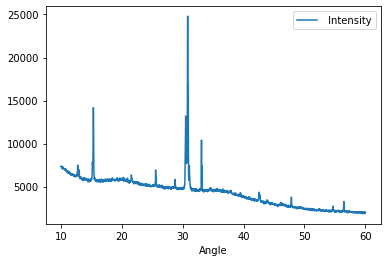

In [23]:
B10Data.plot(x='Angle')

y= B10Data[' Intensity']




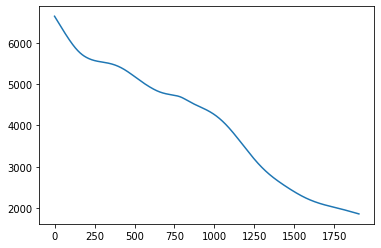

In [24]:
B10= baseline_als(y, 1e6, 0.01, niter=10)
plt.plot(B10)



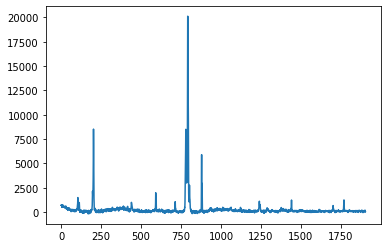

In [25]:
B10_final= y-B10

plt.plot(B10_final)

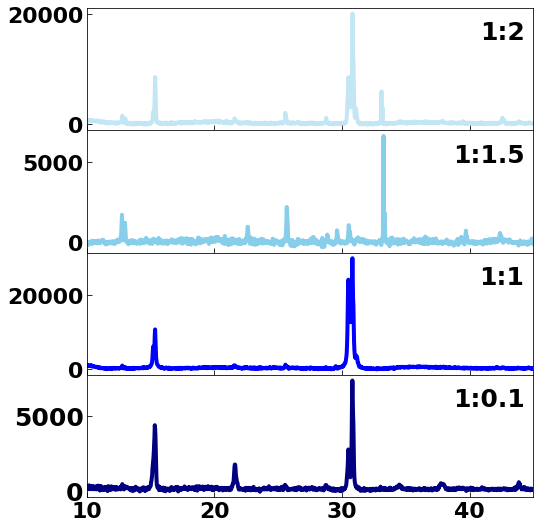

In [26]:
plt.rcParams["font.size"] = "25"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

x= B10Data[:1500]['Angle']
gridspec_kw = dict(
    
    hspace=0,
)

fig, axes = plt.subplots(
    nrows=4, ncols=1, sharex=True, gridspec_kw=gridspec_kw, figsize=(8,9)
)

axes[3].plot(x,A1_final[:1500],label='A1', color='navy', linewidth=4)
axes[3].tick_params(
    axis='x', length=5, labelsize=22, direction='in')
axes[3].tick_params(
    axis='y', length=5, direction='in')
axes[2].plot(x,A10_final[:1500],label= "A10", color='blue', linewidth=4)
axes[2].tick_params(
    axis='x', length=5, direction='in')
axes[2].tick_params(
    axis='y', length=5, labelsize=22, direction='in')
axes[1].plot(x,B5Data[' Intensity'][:1500],label='B5', color='skyblue', linewidth=4)
axes[1].tick_params(
    axis='x', length=5, direction='in')
axes[1].tick_params(
    axis='y', length=5, labelsize=22, direction='in')
axes[0].plot(x,B10_final[:1500],label='B10',color='skyblue', linewidth=4, alpha=0.5)
axes[0].tick_params(
    axis='x', length=5, direction='in')
axes[0].tick_params(
    axis='y', length=5, labelsize=22, direction='in')

axes[0].annotate('1:2',xy=(45,20000),xycoords='data',
            xytext=(0.98, 0.9), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top', fontsize=25
            )
axes[1].annotate('1:1.5',xy=(45,1000),xycoords='data',
            xytext=(0.98, 0.9), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top', fontsize=25
            )
axes[2].annotate('1:1',xy=(45,20000),xycoords='data',
            xytext=(0.98, 0.9), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top', fontsize=25
            )
axes[3].annotate('1:0.1',xy=(45,5000),xycoords='data',
            xytext=(0.98, 0.9), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top', fontsize=25
            )
#axes[0].annotate('$CsPbBr_3$', xy=(41, 1.37), xycoords=axes[0].get_xaxis_transform(),color='green', fontsize=25)
#axes[0].annotate('$Cs_4PbBr_6$', xy=(41, 1.12), xycoords=axes[0].get_xaxis_transform(),color='skyblue', fontsize=25)
axes[3].set_xticklabels([10,20,30,40,45], fontsize=22)
axes[0].set_xlim(10,45)

#plt.xlabel('2'r'$\theta$ (degrees)', fontsize=25, labelpad=15)
#fig.text(0,0.37, 'Intensity (cps)', fontsize=25, ha='center', rotation='vertical')

plt.show()

fig.savefig('XRD plots.tif', bbox_inches='tight',dpi=300)
#Please change the yticklabels with larger font size of 20